---

# <center> ★ AI / ML Project - Attrition Analysis for IBM ★
#### <center> ***Domain: Human Resourse***

---

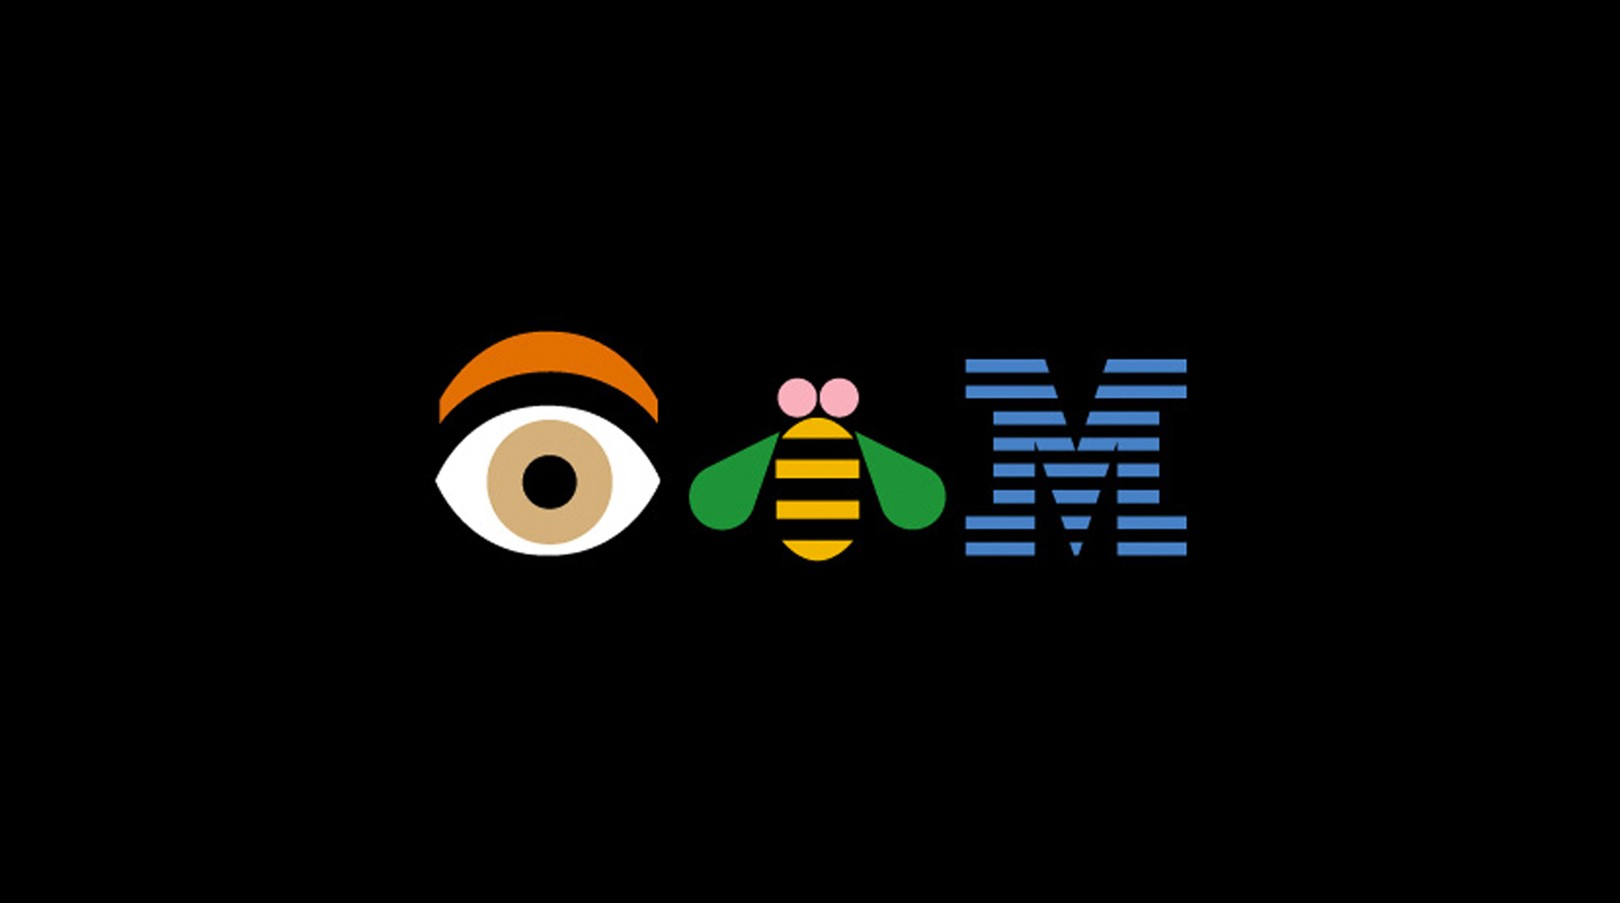

In [1]:
from IPython import display
display.Image("https://raw.githubusercontent.com/Masterx-AI/Project_Attrition_Analysis_for_IBM/main/ibm.jpg")

---

### Description:

IBM is an American MNC operating in around 170 countries with major business verticals as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

### Acknowledgements:
This dataset has been referred from Kaggle: https://www.kaggle.com/yasserh/ibm-attrition-dataset

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification models to predict the anticipated attrition of employees.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [2]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [3]:
#Importing the dataset

df = pd.read_csv('../input/ibm-attrition-dataset/IBM.csv')
#df.drop([''],axis=1, inplace=True)

target = 'Attrition'
labels = ['Yes','No']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2



Inference: The Datset consists of 13 features & 1470 samples.


In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [5]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Attrition                     2
Department                    3
MaritalStatus                 3
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
Education                     5
EducationField                6
NumCompaniesWorked           10
DistanceFromHome             29
YearsAtCompany               37
Age                          43
MonthlyIncome              1349
dtype: int64

In [6]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 7 categorical features.


In [7]:
#Checking the stats of all the columns

display(df.describe())

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

# <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


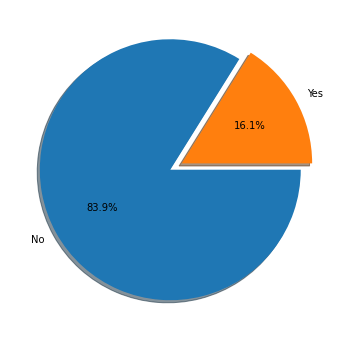

In [8]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

                               Visualising Categorical Features:                                


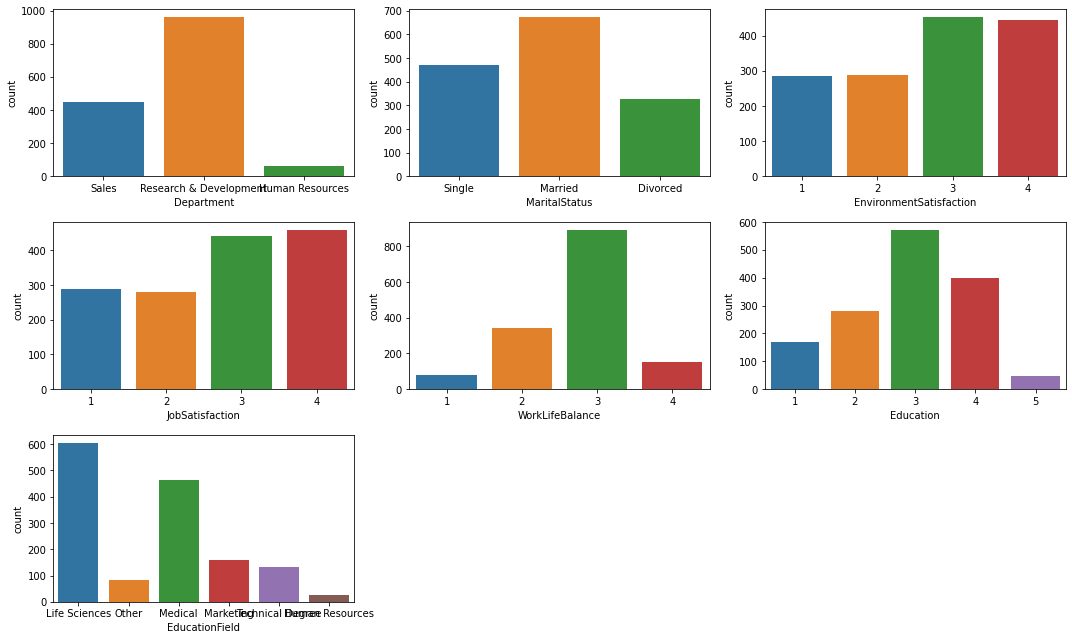

In [9]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=6:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

**Inference:** Visualizing the categorical features reveal lot of information about the dataset.

                                     Features Distribution                                      


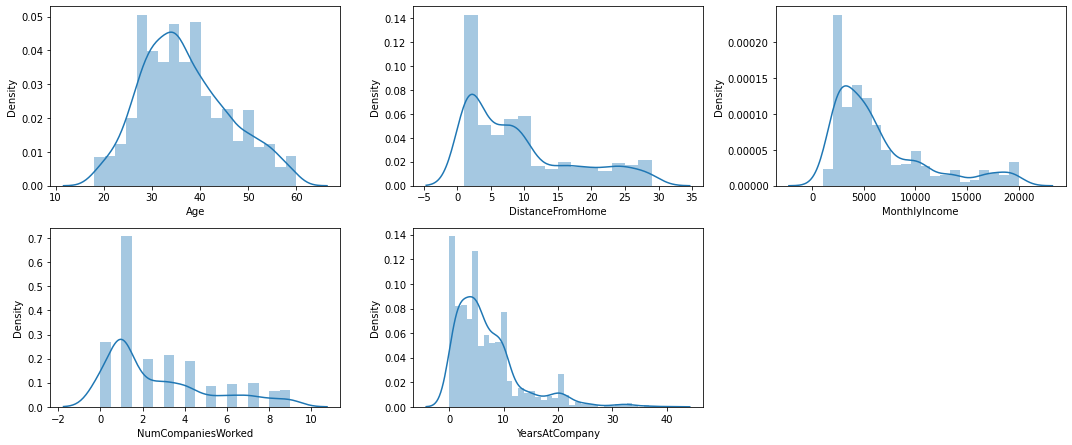

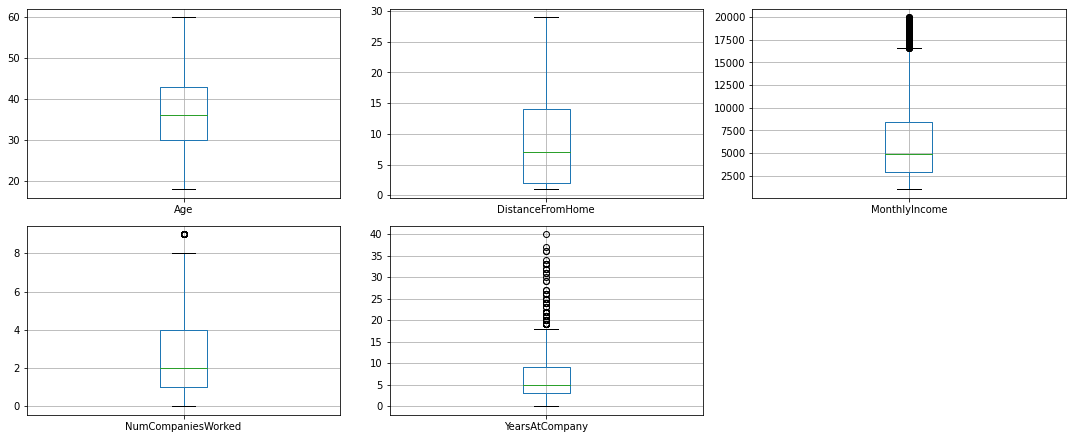

In [10]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

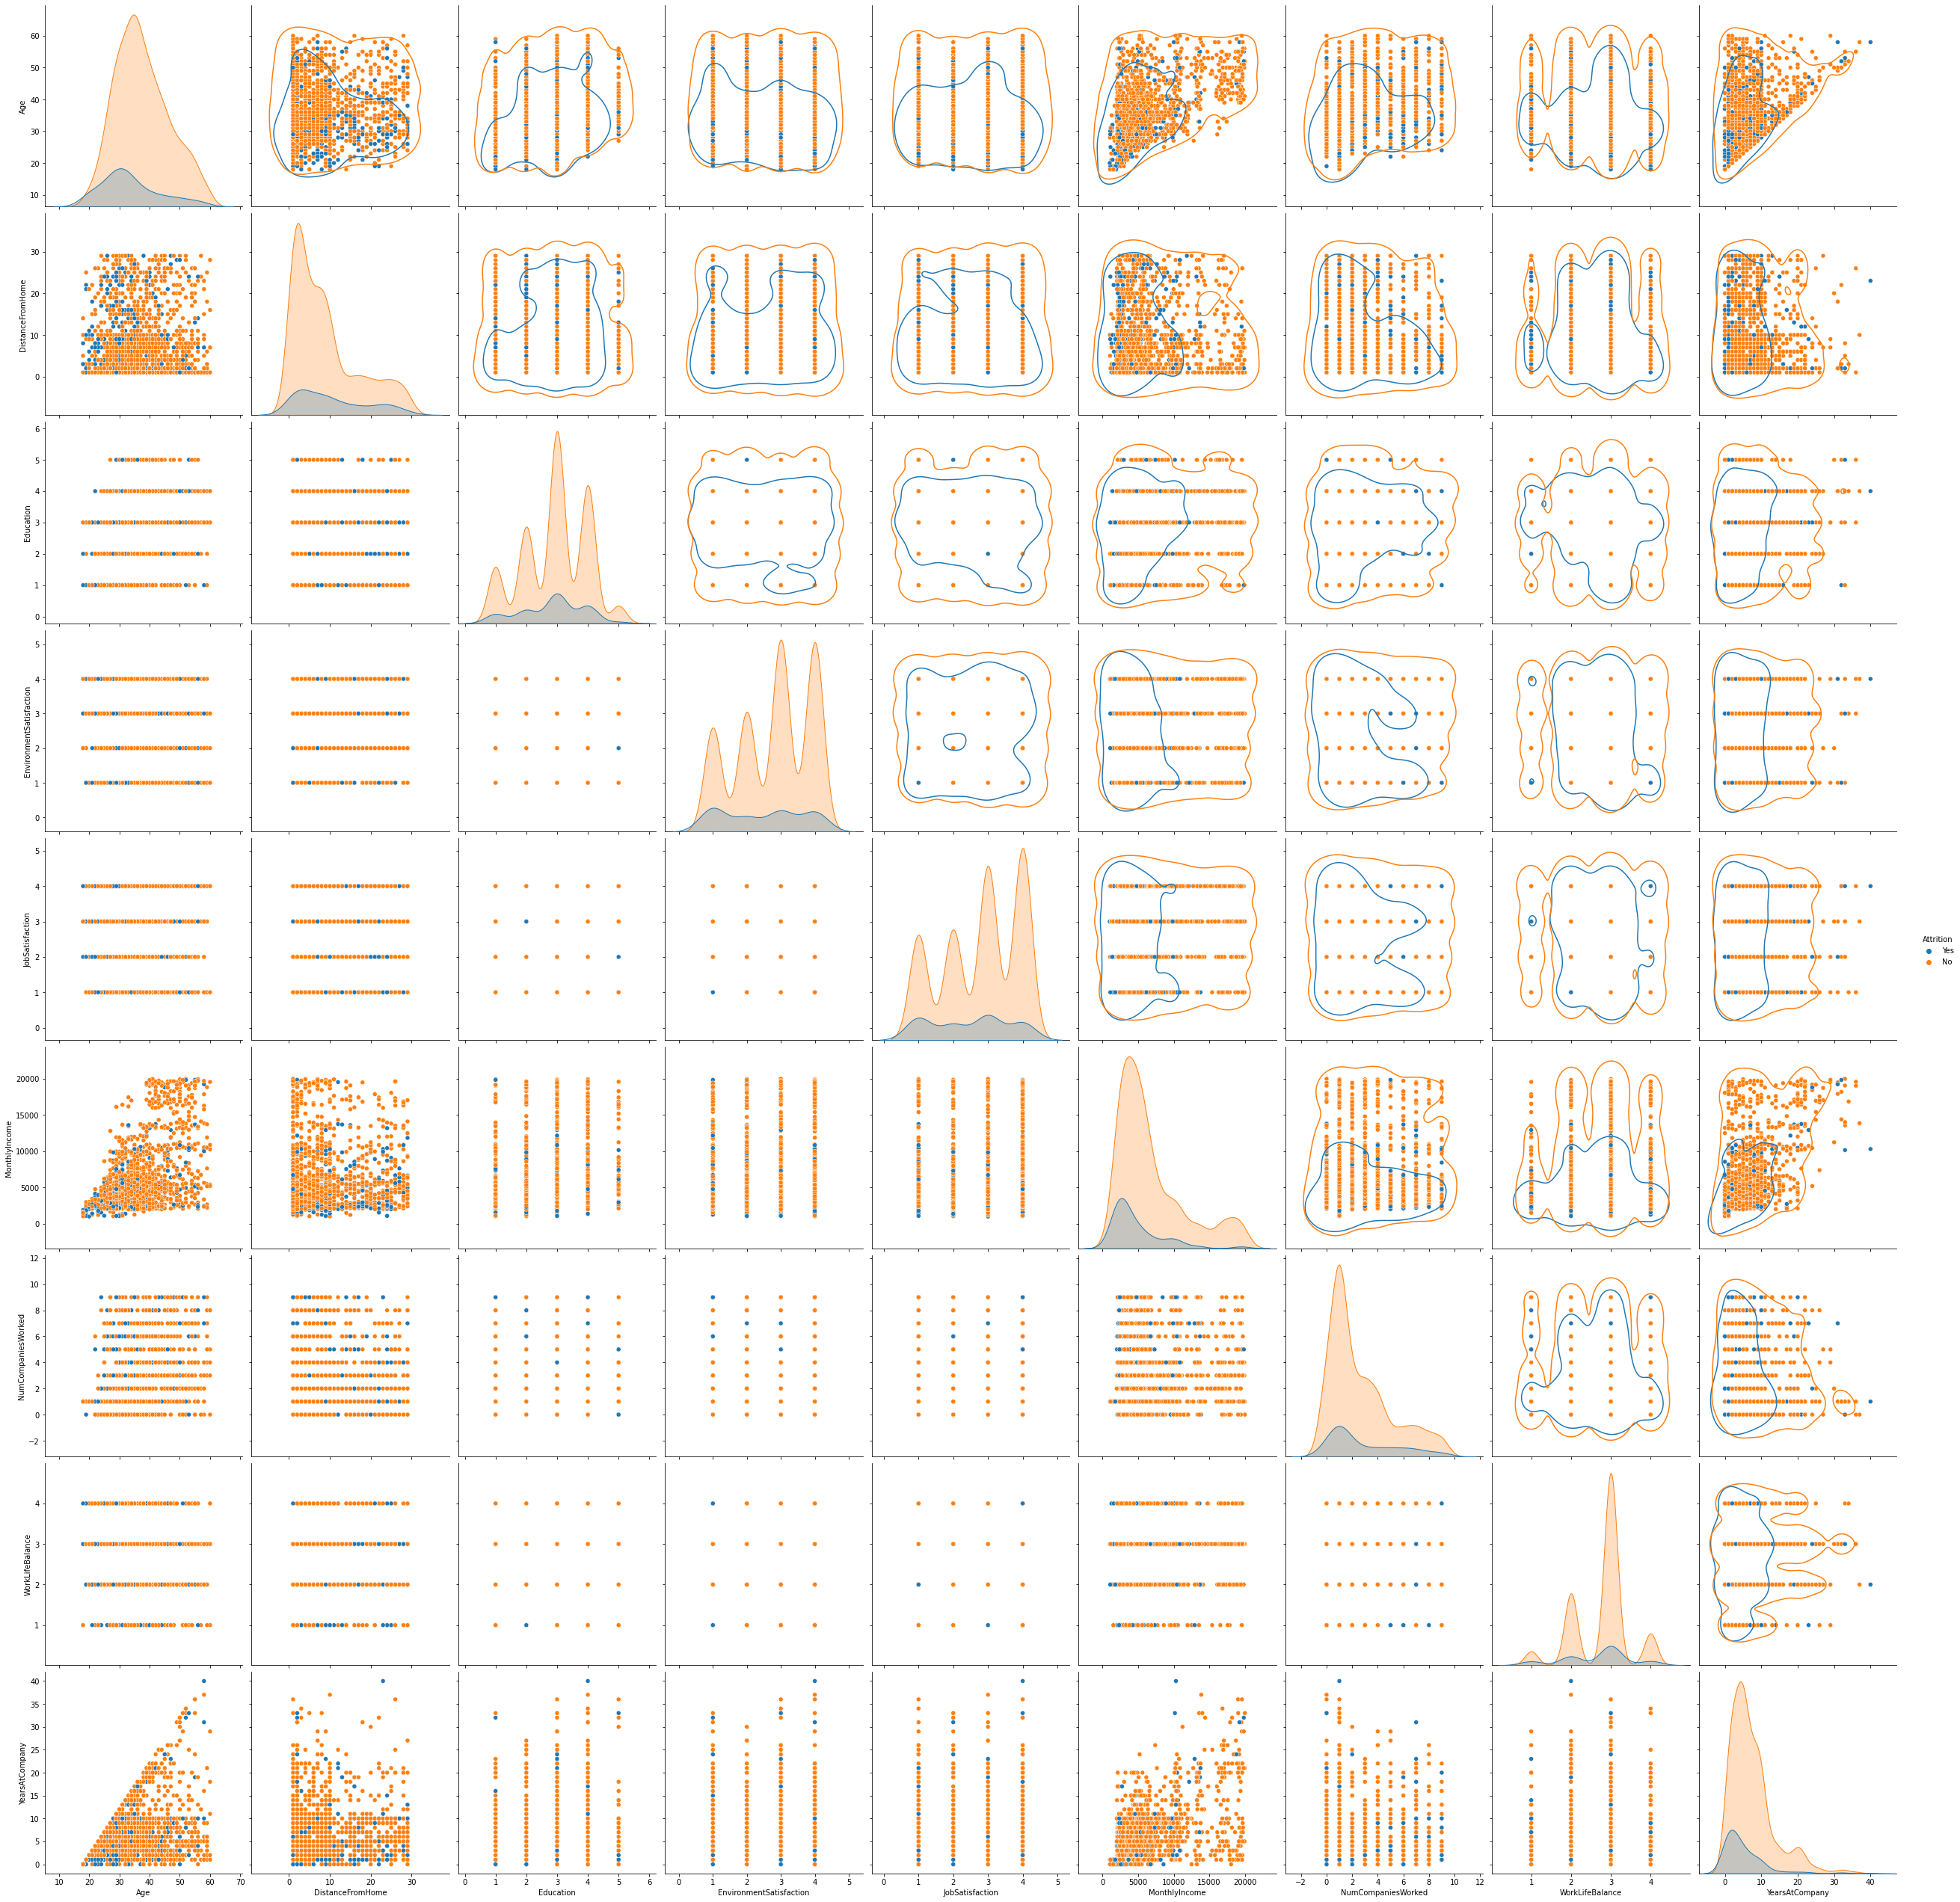

In [11]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

# <center> 3. Data Preprocessing

In [12]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [13]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                         Total Null Values  Percentage
Age                                      0         0.0
Attrition                                0         0.0
Department                               0         0.0
DistanceFromHome                         0         0.0
Education                                0         0.0
EducationField                           0         0.0
EnvironmentSatisfaction                  0         0.0
JobSatisfaction                          0         0.0
MaritalStatus                            0         0.0
MonthlyIncome                            0         0.0
NumCompaniesWorked                       0         0.0
WorkLifeBalance                          0         0.0
YearsAtCompany                           0         0.0


**Inference:** There are many outliers in the dataset. Let us try to impute the missing values

In [14]:
#Converting categorical Columns to Numeric

#df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

#Target Variable
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e]=i
df1[target]=df1[target].map(MAP)
print('Mapping Target variable --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

Mapping Target variable ---> {'Yes': 0, 'No': 1}

Dummy Encoding on features:
Department
MaritalStatus
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance
Education
EducationField


(1470, 28)

In [15]:
# # Fixing Empty Categorical Columns

# for x in [i for i in ecc if i in cf]:
#     a = df1[x]
#     b=[]; c=[]

#     for i,e in enumerate(a):
#         if e!=e:
#             b.append(i)
#         else:
#             c.append(i)

#     RF = RandomForestClassifier()
#     RF.fit(df3.loc[c],a[c])
#     d = RF.predict(df3.loc[b])

#     df3[x] = a
#     f=0
#     for i,e in enumerate(df3[x]):
#         if e!=e:
#             df3.loc[i,x] = d[f]
#             f+=1
#     df3 = pd.concat([df3.drop([x], axis=1), pd.DataFrame(pd.get_dummies(df3[x], drop_first=True, prefix=str(x)))],axis=1)   
# df3

In [16]:
# # Fixing Empty Numerical Columns

# for x in [i for i in ecc if i not in cf]:
#     a = df1[x]
#     b=[]; c=[]

#     for i,e in enumerate(a):
#         if e!=e:
#             b.append(i)
#         else:
#             c.append(i)

#     LR = LinearRegression()
#     LR.fit(df3.loc[c],a[c])
#     d = LR.predict(df3.loc[b])

#     df3[x] = a
#     f=0
#     for i,e in enumerate(df3[x]):
#         if e!=e:
#             df3.loc[i,x] = d[f]
#             f+=1
#     #df3 = pd.concat([df3.drop([x], axis=1), pd.DataFrame(pd.get_dummies(df3[x], drop_first=True, prefix=str(x)))],axis=1)   
# df3

In [17]:
#Removal of outlier:

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.25)
        Q3 = df4[i].quantile(0.75)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,0,1,5993,8,6,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,49,1,8,5130,1,10,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,37,0,2,2090,6,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
3,33,1,3,2909,1,8,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,27,1,2,3468,9,2,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0



Inference: Before removal of outliers, The dataset had 1470 samples.
Inference: After removal of outliers, The dataset now has 1304 samples.


In [18]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
1    1078
0     226
Name: Attrition, dtype: int64

Class distribution after applying SMOTE Technique:
0    1078
1    1078
Name: Attrition, dtype: int64


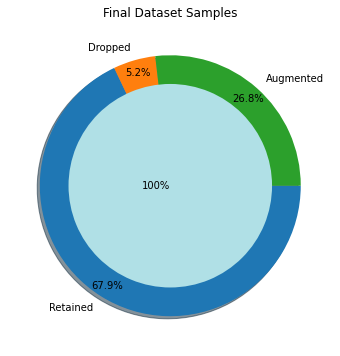


Inference:The final dataset after cleanup has 2156 samples & 28 columns.


In [19]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

---

# <center> 4. Data Manipulation

In [20]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (2156, 27) (2156,) 
Training set  --->  (1724, 27) (1724,) 
Testing set   --->  (432, 27)  (432,)


In [21]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
count,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03,1.724000e+03
mean,8.114159e-18,9.503548e-17,8.513427e-17,-3.395711e-16,6.104939e-17,-3.554774e-17,-2.846395e-17,1.582905e-16,-2.810333e-16,1.093480e-16,1.895880e-16,-3.487156e-16,3.080161e-16,-9.202487e-17,1.810874e-16,-4.729396e-16,-5.023051e-17,9.943065e-16,2.620036e-16,4.237394e-17,1.912623e-17,-1.177197e-16,-1.236443e-17,4.315316e-16,-9.994583e-17,3.307486e-16,2.694416e-16
std,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00
min,-1.893877e+00,-1.153598e+00,-1.282675e+00,-1.106946e+00,-1.288105e+00,-1.023477e+00,-6.095240e-01,-6.653404e-01,-6.753378e-01,-4.079720e-01,-5.110341e-01,-4.828978e-01,-3.714213e-01,-5.281399e-01,-5.056131e-01,-4.459679e-01,-9.546246e-01,-2.722927e-01,-4.050658e-01,-6.454442e-01,-4.920111e-01,-1.375228e-01,-6.680634e-01,-2.795959e-01,-5.218474e-01,-2.010834e-01,-2.610626e-01
25%,-7.148629e-01,-8.900931e-01,-7.739689e-01,-6.784826e-01,-7.739961e-01,-1.023477e+00,-6.095240e-01,-6.653404e-01,-6.753378e-01,-4.079720e-01,-5.110341e-01,-4.828978e-01,-3.714213e-01,-5.281399e-01,-5.056131e-01,-4.459679e-01,-9.546246e-01,-2.722927e-01,-4.050658e-01,-6.454442e-01,-4.920111e-01,-1.375228e-01,-6.680634e-01,-2.795959e-01,-5.218474e-01,-2.010834e-01,-2.610626e-01
50%,-1.253558e-01,-2.313310e-01,-2.797100e-01,-2.500196e-01,-2.598873e-01,9.770612e-01,-6.095240e-01,-6.653404e-01,-6.753378e-01,-4.079720e-01,-5.110341e-01,-4.828978e-01,-3.714213e-01,-5.281399e-01,-5.056131e-01,-4.459679e-01,-9.546246e-01,-2.722927e-01,-4.050658e-01,-6.454442e-01,-4.920111e-01,-1.375228e-01,-6.680634e-01,-2.795959e-01,-5.218474e-01,-2.010834e-01,-2.610626e-01
75%,5.820528e-01,6.909360e-01,4.337398e-01,6.069064e-01,7.683302e-01,9.770612e-01,1.640625e+00,1.502990e+00,1.480741e+00,-4.079720e-01,-5.110341e-01,-4.828978e-01,-3.714213e-01,-5.281399e-01,-5.056131e-01,-4.459679e-01,1.047532e+00,-2.722927e-01,-4.050658e-01,1.549321e+00,-4.920111e-01,-1.375228e-01,1.496864e+00,-2.795959e-01,-5.218474e-01,-2.010834e-01,-2.610626e-01
max,3.057983e+00,2.535470e+00,3.836098e+00,2.749222e+00,3.338874e+00,9.770612e-01,1.640625e+00,1.502990e+00,1.480741e+00,2.451149e+00,1.956817e+00,2.070832e+00,2.692360e+00,1.893438e+00,1.977797e+00,2.242314e+00,1.047532e+00,3.672519e+00,2.468735e+00,1.549321e+00,2.032474e+00,7.271520e+00,1.496864e+00,3.576591e+00,1.916269e+00,4.973062e+00,3.830500e+00



                                Standardardization on Testing set                                


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.061049,0.017840,0.053993,0.028680,-0.025444,0.064779,-0.000109,0.082533,-0.106373,-0.083674,0.031665,0.084598,0.089564,-0.001223,0.080748,-0.029035,0.041819,-0.034873,-0.025884,0.060742,0.010549,-0.000318,0.028522,0.068532,-0.013907,-0.021426,-0.033754
std,0.997314,1.032943,1.019265,1.005623,0.938956,0.997547,1.001103,1.031885,0.951371,0.907715,1.023329,1.062918,1.096647,1.000323,1.055905,0.974267,1.002228,0.939281,0.973709,1.026476,1.009206,1.000022,1.012521,1.106385,0.991307,0.948357,0.938306
min,-1.893877,-1.153598,-1.270054,-1.106946,-1.288105,-1.023477,-0.609524,-0.665340,-0.675338,-0.407972,-0.511034,-0.482898,-0.371421,-0.528140,-0.505613,-0.445968,-0.954625,-0.272293,-0.405066,-0.645444,-0.492011,-0.137523,-0.668063,-0.279596,-0.521847,-0.201083,-0.261063
25%,-0.596961,-0.890093,-0.762677,-0.678483,-0.773996,-1.023477,-0.609524,-0.665340,-0.675338,-0.407972,-0.511034,-0.482898,-0.371421,-0.528140,-0.505613,-0.445968,-0.954625,-0.272293,-0.405066,-0.645444,-0.492011,-0.137523,-0.668063,-0.279596,-0.521847,-0.201083,-0.261063
50%,-0.007454,-0.231331,-0.191702,-0.250020,-0.259887,0.977061,-0.609524,-0.665340,-0.675338,-0.407972,-0.511034,-0.482898,-0.371421,-0.528140,-0.505613,-0.445968,-0.954625,-0.272293,-0.405066,-0.645444,-0.492011,-0.137523,-0.668063,-0.279596,-0.521847,-0.201083,-0.261063
75%,0.582053,0.690936,0.524820,0.606906,0.511276,0.977061,1.640625,1.502990,1.480741,-0.407972,-0.511034,-0.482898,-0.371421,-0.528140,-0.505613,-0.445968,1.047532,-0.272293,-0.405066,1.549321,-0.492011,-0.137523,1.496864,-0.279596,-0.521847,-0.201083,-0.261063
max,3.057983,2.535470,3.880268,2.749222,3.338874,0.977061,1.640625,1.502990,1.480741,2.451149,1.956817,2.070832,2.692360,1.893438,1.977797,2.242314,1.047532,3.672519,2.468735,1.549321,2.032474,7.271520,1.496864,3.576591,1.916269,4.973062,3.830500


---

# <center> 5. Feature Selection/Extraction

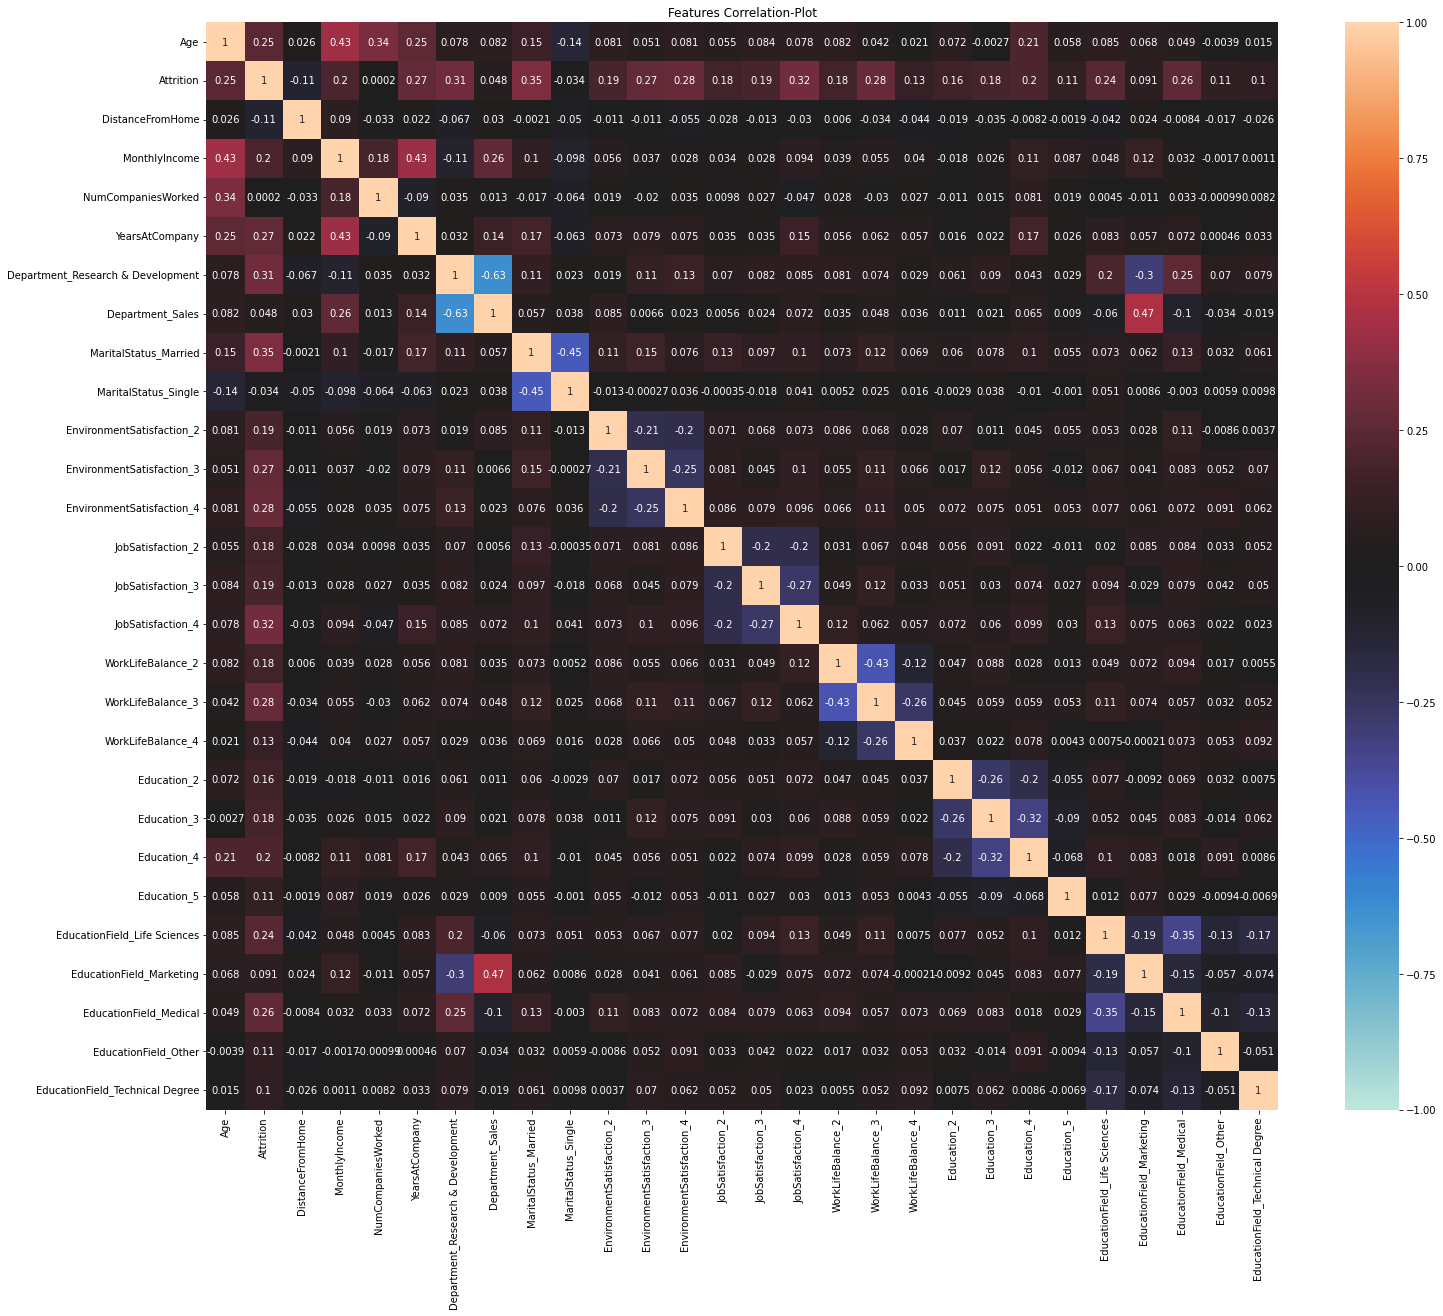

In [22]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[24,20])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. Especially in case of gender & survived.Hence it is clear that probably women were given more importance to save first. Similiary we have obvious strong correlation between fare & Passenger-Class. 

Let us check with different techniques if we can improve the model's performance by performing Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Decomposition Method - Principle Component Analysis (PCA)

## 5a. Manual Method - VIF

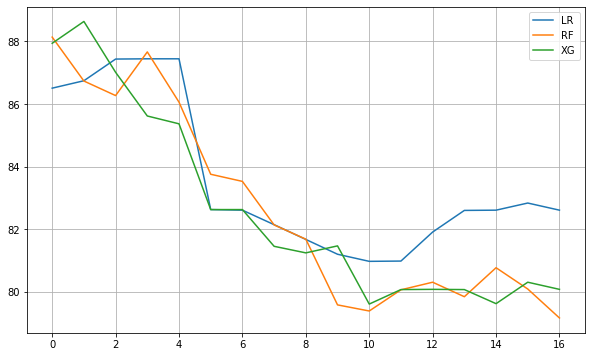

In [23]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores1=[]; scores2=[]; scores3=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        
for i in range(len(X.columns.values)-1):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1:
        scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.7,0.85])
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

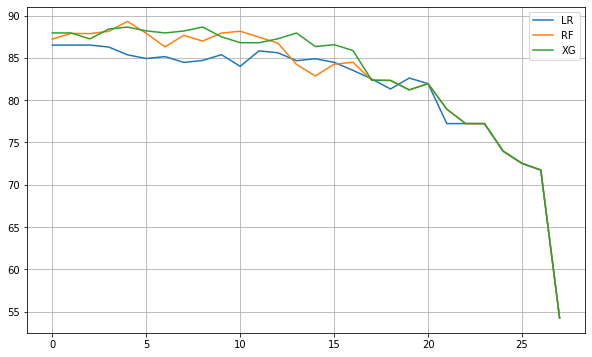

In [24]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

for i in range(len(X.columns.values)):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

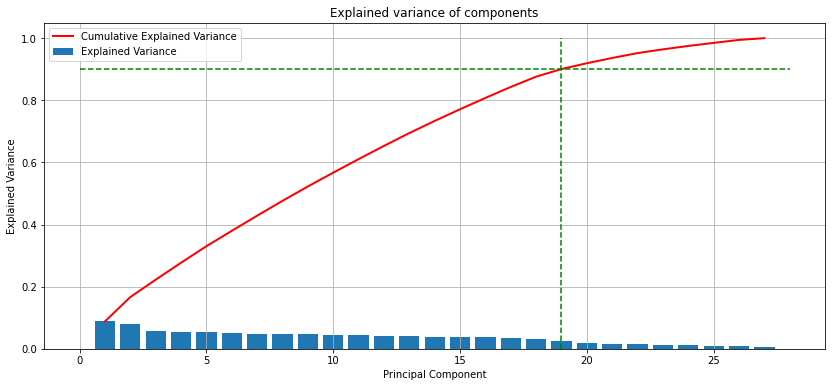

In [25]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([19,19],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

**Inference:** We shall avoid performing dimensionality reduction for the current problem.

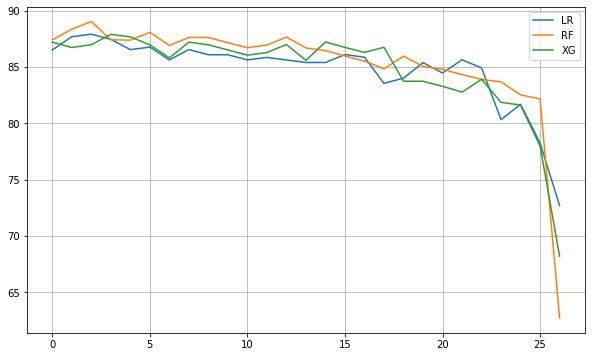

In [26]:
#Applying PCA Transformations

# scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

scores1=[]; scores2=[]; scores3=[]
for i in range(len(X.columns.values)):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)
    
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std_pca, Train_Y, eval_metric='logloss').predict(Test_X_std_pca),average='weighted')*100)

    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

**Inference:** In VIF, RFE & PCA Techniques, we did notice any better scores upon dropping some multicollinear features. But in order to avoid the curse of dimensionality, we can capture top 90% of the data Variance explained by top n PCA components.

In [27]:
#### Finalising the shortlisted features

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-2)   
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

86.27985499466702
86.74494465586474
88.40151225267454
(1724, 25)
(432, 25)


---

# <center> 6. Predictive Modeling

In [28]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [29]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 87.0%
F1 Score = 87.0%

 Confusiton Matrix:
 [[169  40]
 [ 16 207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       209
           1       0.84      0.93      0.88       223

    accuracy                           0.87       432
   macro avg       0.88      0.87      0.87       432
weighted avg       0.87      0.87      0.87       432



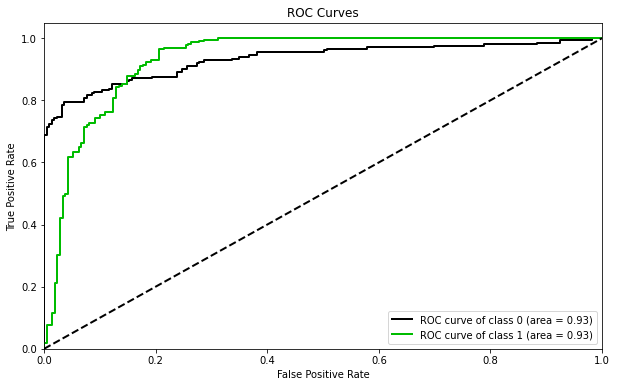


Interpreting the Output of Logistic Regression:

intercept  -0.4105431165211013
classes [0 1]


,coeff
Age,0.206598
DistanceFromHome,-0.264164
MonthlyIncome,0.303318
NumCompaniesWorked,-0.186171
YearsAtCompany,0.288627
Department_Research & Development,0.386864
MaritalStatus_Married,0.343543
EnvironmentSatisfaction_2,0.430967
EnvironmentSatisfaction_3,0.523023
EnvironmentSatisfaction_4,0.555695


In [30]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 82.39999999999999%
F1 Score = 82.39999999999999%

 Confusiton Matrix:
 [[170  39]
 [ 37 186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       209
           1       0.83      0.83      0.83       223

    accuracy                           0.82       432
   macro avg       0.82      0.82      0.82       432
weighted avg       0.82      0.82      0.82       432



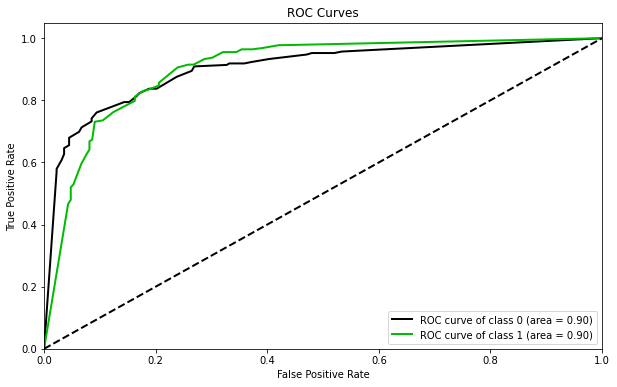


Interpreting the output of Decision Tree:



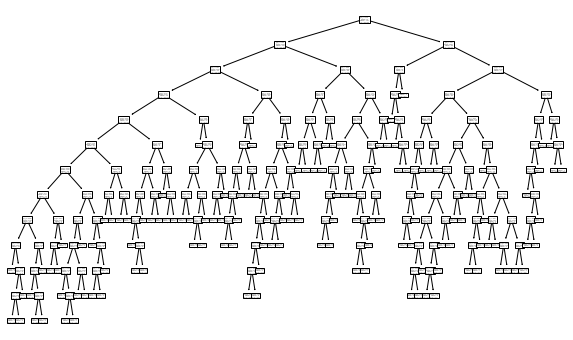

In [31]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 86.1%
F1 Score = 86.0%

 Confusiton Matrix:
 [[166  43]
 [ 17 206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       209
           1       0.83      0.92      0.87       223

    accuracy                           0.86       432
   macro avg       0.87      0.86      0.86       432
weighted avg       0.87      0.86      0.86       432



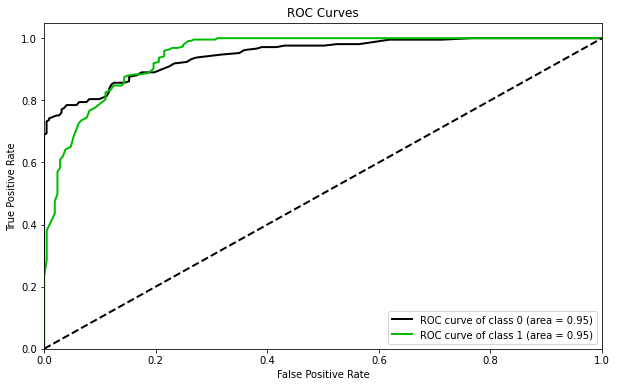


Interpreting the output of Random Forest:



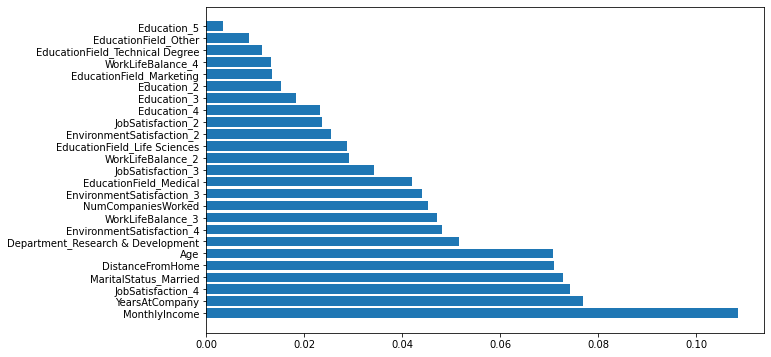

In [32]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 85.9%
F1 Score = 85.8%

 Confusiton Matrix:
 [[166  43]
 [ 18 205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       209
           1       0.83      0.92      0.87       223

    accuracy                           0.86       432
   macro avg       0.86      0.86      0.86       432
weighted avg       0.86      0.86      0.86       432



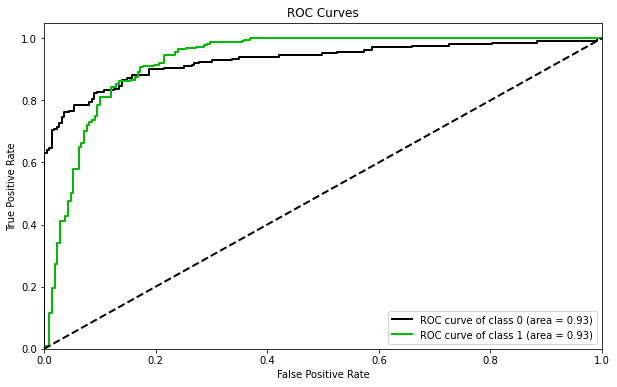

In [33]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 88.2%
F1 Score = 88.1%

 Confusiton Matrix:
 [[168  41]
 [ 10 213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87       209
           1       0.84      0.96      0.89       223

    accuracy                           0.88       432
   macro avg       0.89      0.88      0.88       432
weighted avg       0.89      0.88      0.88       432



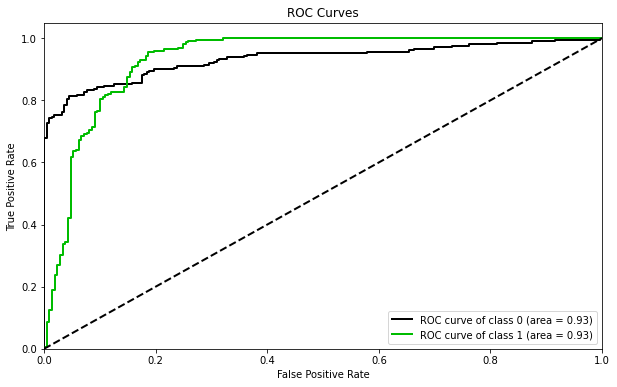

In [34]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 85.6%
F1 Score = 85.7%

 Confusiton Matrix:
 [[183  26]
 [ 36 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       209
           1       0.88      0.84      0.86       223

    accuracy                           0.86       432
   macro avg       0.86      0.86      0.86       432
weighted avg       0.86      0.86      0.86       432



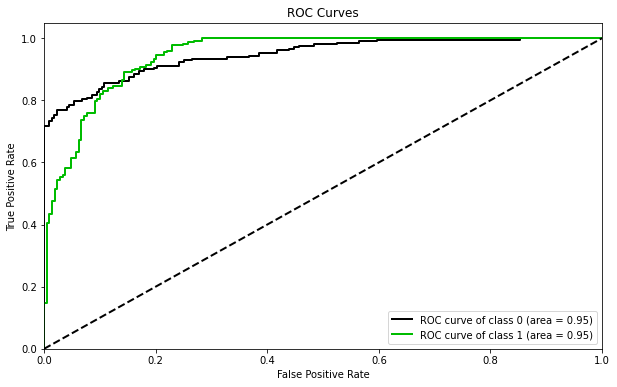

In [35]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 90.3%
F1 Score = 90.2%

 Confusiton Matrix:
 [[179  30]
 [ 12 211]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       209
           1       0.88      0.95      0.91       223

    accuracy                           0.90       432
   macro avg       0.91      0.90      0.90       432
weighted avg       0.91      0.90      0.90       432



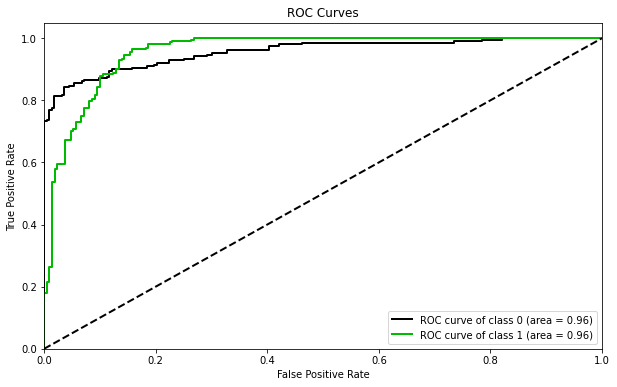

In [36]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 88.4%
F1 Score = 88.4%

 Confusiton Matrix:
 [[177  32]
 [ 18 205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       209
           1       0.86      0.92      0.89       223

    accuracy                           0.88       432
   macro avg       0.89      0.88      0.88       432
weighted avg       0.89      0.88      0.88       432



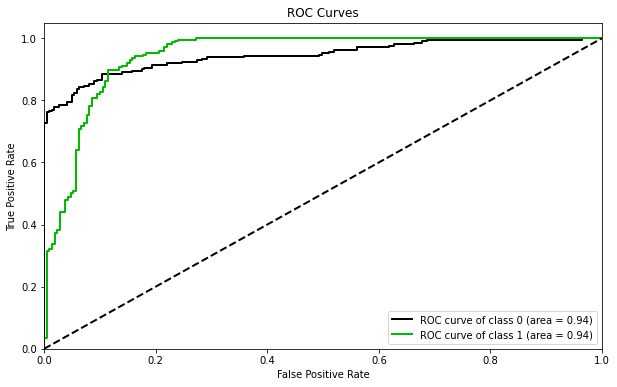

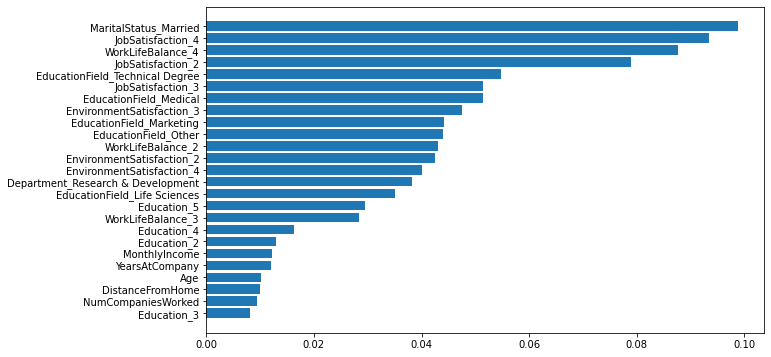

In [37]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.barh(xgbf.index,xgbf.values[:,0])
plt.show()

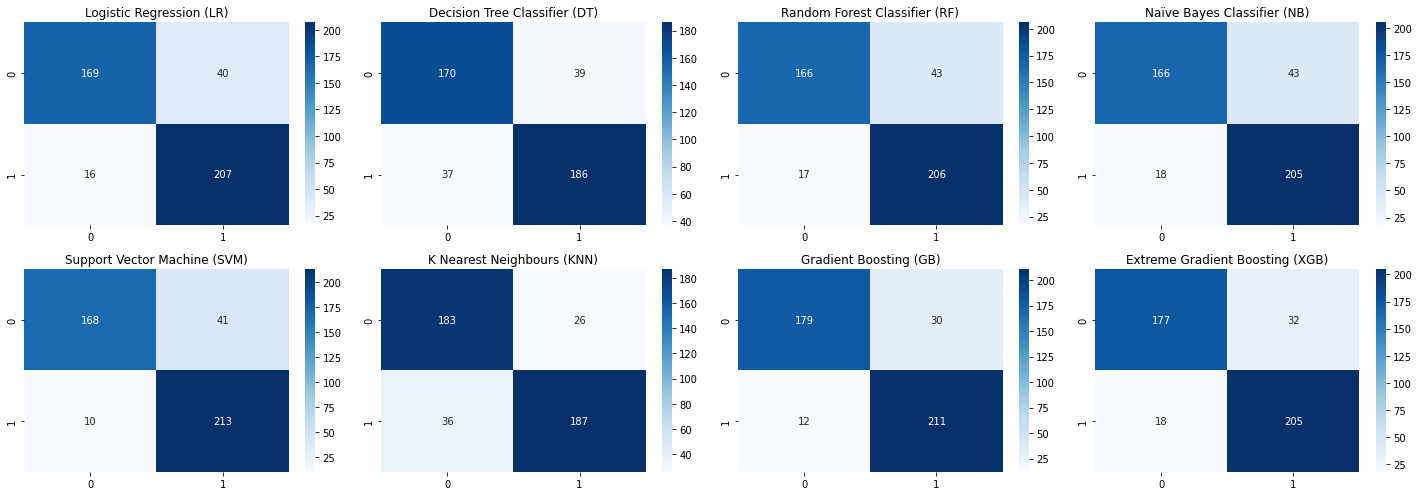

In [38]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

                                                   ML Algorithms Comparison                                                   


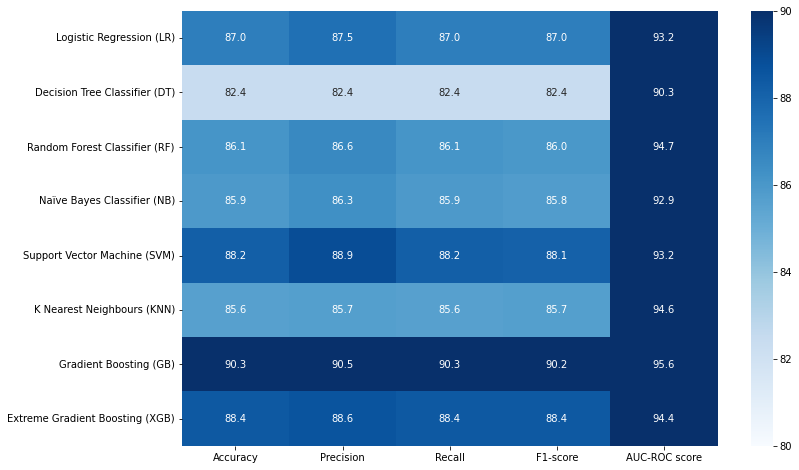

In [39]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(130))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=80, vmax=90, cmap='Blues', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1 score. We can note from the above heatmap that the Random Forest & Extreme Gradient Boosting Model Performed well on the current dataset...

---

# <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totalling around 300 samples & after preprocessing 5.2% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 26.8% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The XG-Boosting & Random Forest Classifier performed exceptionally well on the current dataset, considering F1-Score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

In [40]:
#<<<---------------------------------------------THE END----------------------------------------------------------------->>>